# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane show an overall smaller tumor volume than Ceftamin and Infubinol.
- Compared to Ramicane, even though Capomulin has a slightly larger median tumor volume, it's interquartile range is smaller and it shows a negative skew. This means that the outcomes are less dispersed and therefore appear to be more reliable.
- There is a strong positive correlation (0.84) between mice weight and average tumor volume.
- There is a very strong negative correlation (0.998) between tumor volume and time when Capomulin is administered.
- More in depth analysis is required of mice administered Capomulin vs other drugs.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [6]:
study_results.Timepoint.value_counts()

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: count, dtype: int64

In [7]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [9]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending = False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop = True)
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
df2["Tumor Volume (mm3)"].describe()

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

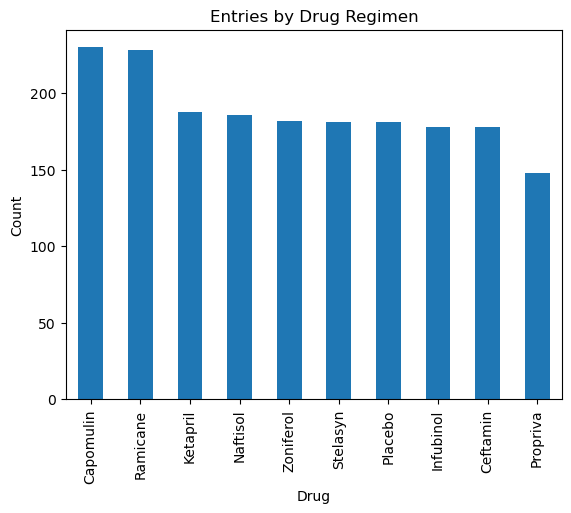

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
entries = df2["Drug Regimen"].value_counts()
entries.plot(kind = "bar", xlabel = "Drug", ylabel = "Count", title = "Entries by Drug Regimen")

plt.show()

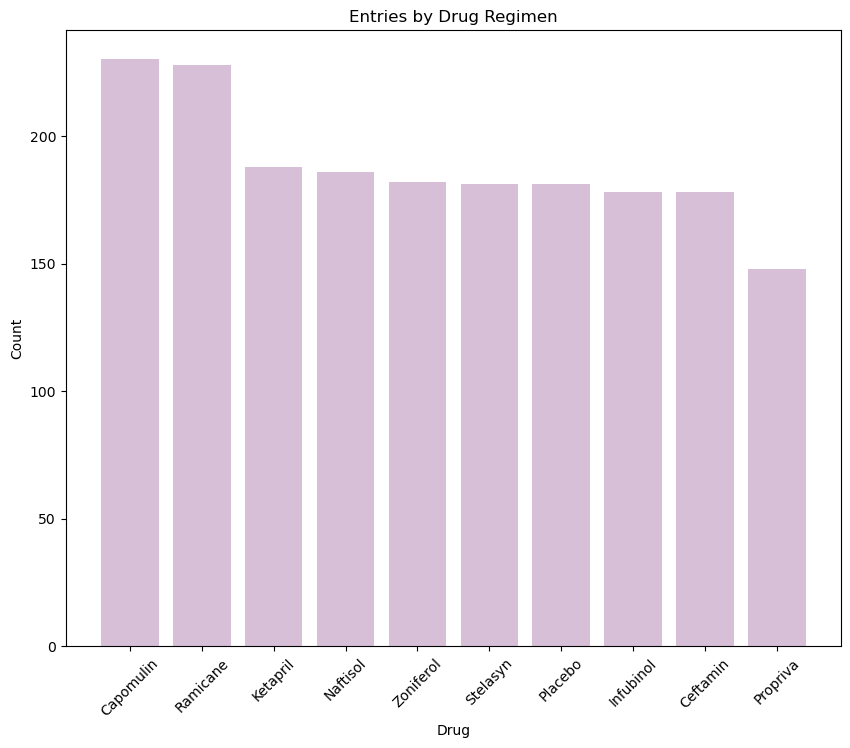

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
entries = df2["Drug Regimen"].value_counts()

plt.figure(figsize=(10,8))
plt.bar(entries.index, entries, color = "thistle")

plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Entries by Drug Regimen")
plt.xticks(rotation = 45)
plt.show()

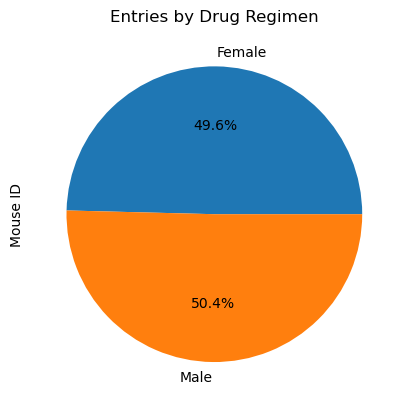

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
entries = df2.groupby("Sex")["Mouse ID"].nunique()

entries.plot(kind = "pie", autopct = "%1.1f%%", title = "Entries by Drug Regimen")
plt.show()

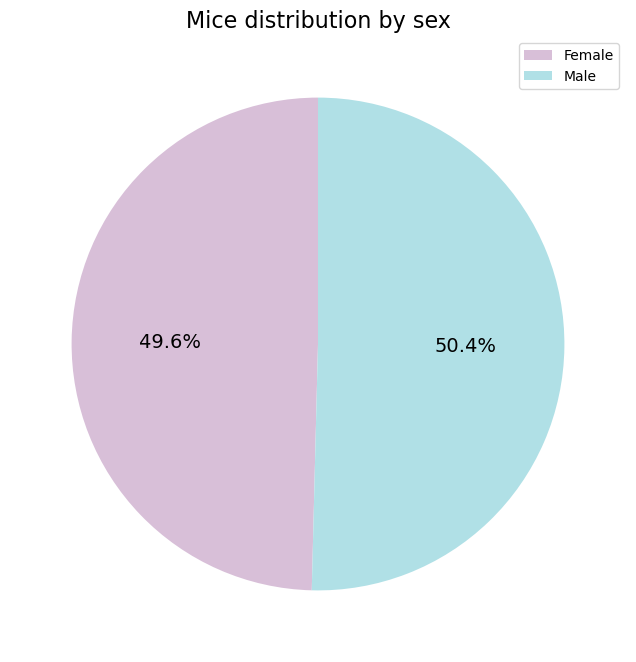

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
entries = df2.groupby("Sex")["Mouse ID"].nunique()
# labels = entries.index

plt.figure(figsize = (8,8))
plt.pie(entries, autopct = "%1.1f%%", startangle = 90, colors = ["thistle", "powderblue"], textprops={'fontsize': 14})
plt.title("Mice distribution by sex", fontsize = 16)
plt.legend(entries.index)

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_tumor = pd.merge(max_time,df2, on = ["Mouse ID", "Timepoint"])
df_tumor.head (20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [21]:
df_tumor["Mouse ID"].value_counts()

Mouse ID
a203    1
s121    1
q597    1
q610    1
q633    1
       ..
j246    1
j296    1
j365    1
j755    1
z969    1
Name: count, Length: 248, dtype: int64

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# drugs = df_tumor["Drug Regimen"].unique()
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
#   Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = df_tumor.loc[df_tumor["Drug Regimen"] == drug]
    
    # add subset 
    tumor_subset = tumor_data["Tumor Volume (mm3)"]
    tumor_list.append(tumor_subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_subset.quantile([0.25,0.75])
    q1 = tumor_subset.quantile(0.25)
    q3 = tumor_subset.quantile(0.75)
    iqr = q3 - q1
    
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    
    outliers = tumor_subset.loc[(lowerbound > tumor_subset)|(upperbound < tumor_subset)]
    print(f"{drug}\n{outliers}\n")

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)



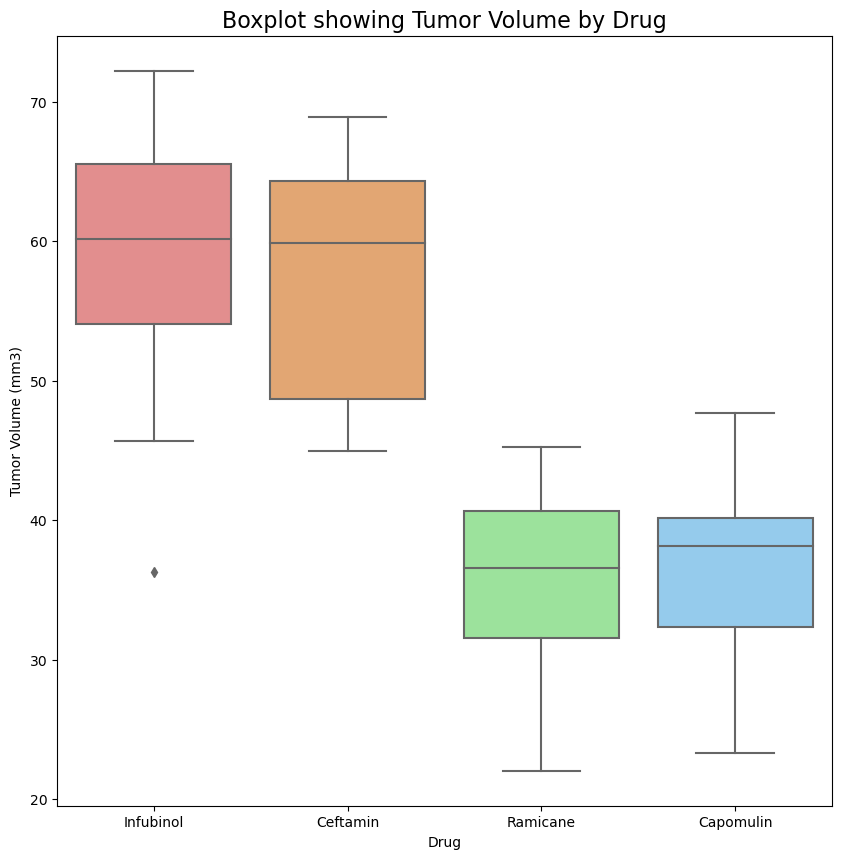

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = df_tumor.loc[df_tumor["Drug Regimen"].isin (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

import seaborn as sns
palette = ["lightcoral", "sandybrown", "lightgreen", "lightskyblue"]

plt.figure(figsize=(10,10))
sns.boxplot(tumor_data, x = "Drug Regimen", y = "Tumor Volume (mm3)", palette = palette)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug")
plt.title("Boxplot showing Tumor Volume by Drug",fontsize = 16)
    
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_capomulin = df2.loc[df2["Drug Regimen"]== "Capomulin"]
df_capomulin["Mouse ID"].value_counts()

Mouse ID
b128    10
v923    10
m957    10
i557    10
t565    10
l897    10
g288    10
g316    10
y793    10
r944    10
i738    10
w914    10
j119    10
u364    10
s710    10
l509    10
x401    10
b742    10
s185    10
r554    10
m601    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

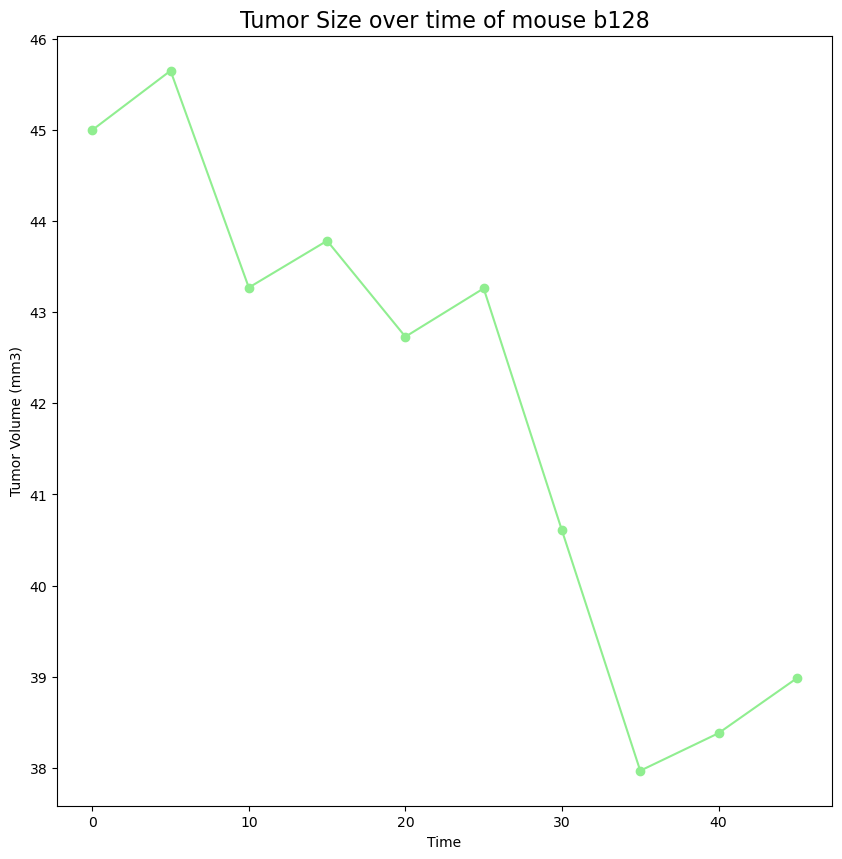

In [27]:
mouse = df_capomulin["Mouse ID"][0]

history = df_capomulin.loc[df_capomulin["Mouse ID"] == mouse]
plt.figure(figsize = (10,10))
plt.plot(history["Timepoint"], history["Tumor Volume (mm3)"], color = "lightgreen", marker = "o")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Size over time of mouse {mouse}", fontsize = 16)
plt.show()

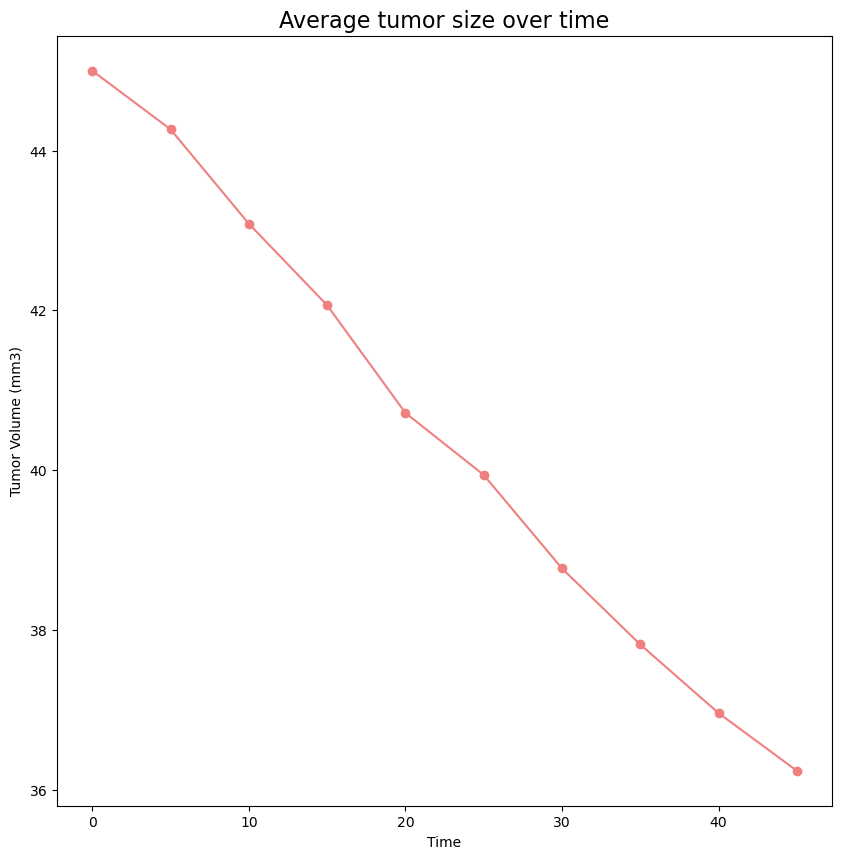

In [49]:
# Line graph for average tumor size vs time (to find if on average administering capomulin is reducing tumor size)

# group data by time and set mean tumor volume.

df_capomulin2 = df2.loc[df2["Drug Regimen"]== "Capomulin"]
df_capomulin2
df_capomulin_ave = df_capomulin2.groupby("Timepoint")["Tumor Volume (mm3)"].mean().reset_index()

plt.figure(figsize = (10,10))
plt.plot(df_capomulin_ave["Timepoint"], df_capomulin_ave["Tumor Volume (mm3)"], color = "lightcoral", marker = "o")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Average tumor size over time", fontsize = 16)
plt.show()

In [28]:
df_capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


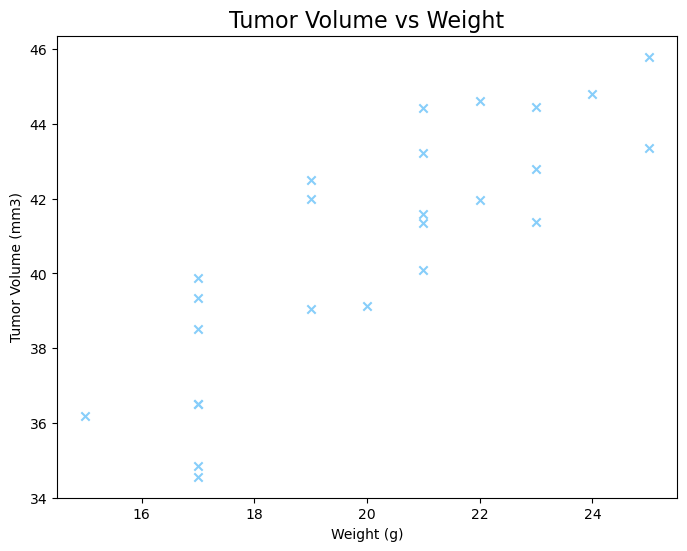

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_capomulin = df_capomulin.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)":"mean"})

plt.figure(figsize = (8,6))
plt.scatter(df_capomulin["Weight (g)"], df_capomulin["Tumor Volume (mm3)"], c = "lightskyblue", marker = "x")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight", fontsize = 16)
plt.show()

## Correlation and Regression

The r-squared is 0.7088568047708723


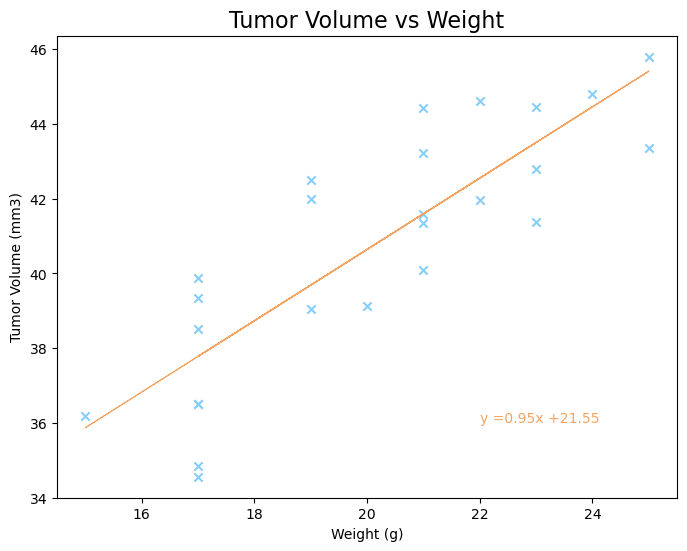

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = df_capomulin["Weight (g)"]
y_values = df_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot
plt.figure(figsize = (8,6))
plt.scatter(x_values, y_values, c = "lightskyblue", marker = "x")
plt.plot(x_values, regress_values, c = "sandybrown", linewidth = 0.7)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight", fontsize = 16)
plt.annotate(line_eq, (22,36), color = "sandybrown")
print (f"The r-squared is {rvalue**2}")
plt.show()

In [31]:
# Calculate correlation for Tumor Volume vs Weight
df_capomulin.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [50]:
# Calculate correlation for average Tumor Volume vs timepoint (to find if on average capomulin is reducing tumor size)
df_capomulin_ave.corr()

,Timepoint,Tumor Volume (mm3)
Timepoint,1.000000,-0.998256
Tumor Volume (mm3),-0.998256,1.000000
